In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif


In [4]:
# Define correlation check function
def correlation_check(df, threshold=0.85, save_path='../results/eda_visualizations/IT24101461/correlation_heatmap.png'):
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Feature Correlation Heatmap (Training Set)')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

    # Identify highly correlated pairs
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    if high_corr:
        print("Highly correlated feature pairs (>|{:.2f}|):".format(threshold))
        for pair in high_corr:
            print(pair)
    else:
        print(f"No feature pairs with correlation higher than {threshold}")
    return high_corr

# Define feature selection function
def select_features(X_train, X_test, y_train, target_col='LUNG_CANCER', k=10, save_path_train='../results/outputs/train_selected_features.csv', save_path_test='../results/outputs/test_selected_features.csv'):
    # Select top k features on training set
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit(X_train, y_train)

    # Get selected features
    selected_features = X_train.columns[selector.get_support()].tolist()
    print("Selected features:", selected_features)

    # Transform both train and test sets
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Create dataframes with selected features and target
    df_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
    df_train_selected[target_col] = y_train.reset_index(drop=True)
    
    df_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)
    df_test_selected[target_col] = y_test.reset_index(drop=True)  # y_test needs to be loaded or passed

    # Save datasets
    df_train_selected.to_csv(save_path_train, index=False)
    df_test_selected.to_csv(save_path_test, index=False)
    
    return df_train_selected, df_test_selected



In [5]:
# Load the datasets processed by balancing and normalization
train_df = pd.read_csv('../results/outputs/train_balanced_normalized.csv')
test_df = pd.read_csv('../results/outputs/test_normalized.csv')

# Separate features and target for train set
X_train = train_df.drop(columns=['LUNG_CANCER'])
y_train = train_df['LUNG_CANCER']

# Separate features for test set (target already in test_df)
X_test = test_df.drop(columns=['LUNG_CANCER'])
y_test = test_df['LUNG_CANCER']

print("Training set head:\n", train_df.head())
print("Test set head:\n", test_df.head())



Training set head:
    GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0     1.0  0.255814      0.0             0.0      0.0            0.0   
1     0.0  0.534884      1.0             0.0      0.0            0.0   
2     0.0  0.604651      1.0             1.0      1.0            0.0   
3     0.0  0.558140      1.0             0.0      0.0            0.0   
4     1.0  0.465116      1.0             0.0      0.0            1.0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ...  \
0              1.0       1.0       1.0       1.0  ...   
1              0.0       1.0       1.0       1.0  ...   
2              1.0       0.0       1.0       0.0  ...   
3              0.0       1.0       0.0       0.0  ...   
4              1.0       1.0       1.0       1.0  ...   

   Age_Smoking_Interaction  Chronic_Health_Score  Symptom_Severity  \
0                 0.000000              1.000000          1.000000   
1                 0.761905              0.666667          1.0000

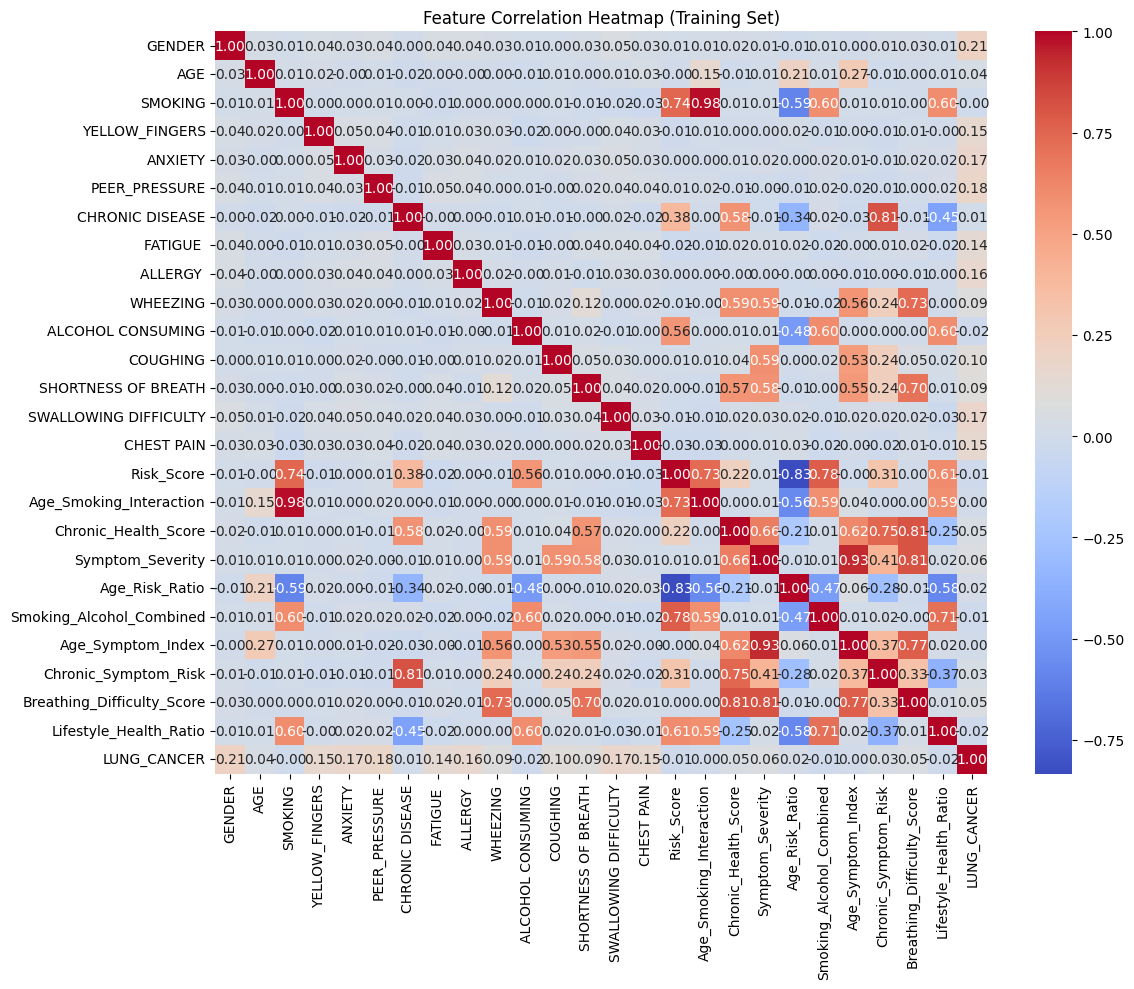

Highly correlated feature pairs (>|0.85|):
('Age_Smoking_Interaction', 'SMOKING', np.float64(0.9822447295076656))
('Age_Symptom_Index', 'Symptom_Severity', np.float64(0.9346294488620689))


In [6]:
# Check correlations on training set
high_corr = correlation_check(train_df)



In [7]:
# Apply feature selection
df_train_selected, df_test_selected = select_features(X_train, X_test, y_train, target_col='LUNG_CANCER', k=10)
print("Sample of training data after feature selection:\n", df_train_selected.head())
print("Sample of test data after feature selection:\n", df_test_selected.head())

# Confirm saves
print("Saved training set to '../results/outputs/train_selected_features.csv'")
print("Saved test set to '../results/outputs/test_selected_features.csv'")

Selected features: ['GENDER', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'FATIGUE ', 'ALLERGY ', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'Age_Risk_Ratio', 'Age_Symptom_Index']
Sample of training data after feature selection:
    GENDER  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  FATIGUE   ALLERGY   \
0     1.0             0.0      0.0            0.0       1.0       1.0   
1     0.0             0.0      0.0            0.0       1.0       1.0   
2     0.0             1.0      1.0            0.0       0.0       1.0   
3     0.0             0.0      0.0            0.0       1.0       0.0   
4     1.0             0.0      0.0            1.0       1.0       1.0   

   SWALLOWING DIFFICULTY  CHEST PAIN  Age_Risk_Ratio  Age_Symptom_Index  \
0                    0.0         0.0        0.096709           0.619048   
1                    1.0         1.0        0.088414           0.761905   
2                    1.0         1.0        0.121437           0.531746   
3                    0.0         